In [19]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor

In [119]:
data = pd.read_csv('data/training_data.csv', delimiter=';')
data.head()

# Group is categorical variable; G1: 1st industry, 11 industries in total

,Group,I1,I2,I3,I4,I5,I6,I7,I8,I9,...,dI51,dI52,dI53,dI54,dI55,dI56,dI57,dI58,Class,Perform
0,G9,"0,136495061","-0,02842866","-0,037771783","-0,232458668","-0,016221513","-0,187506244","-0,322545081","-0,043742915","0,125388591",...,"0,1025625","0,188480519","-0,016026713","-0,1354512","-0,189667144","0,250966607","0,022171096","-0,004265114",-1,"-0,033763805"
1,G5,"-0,714521622","-0,042137266","-0,052967899","-0,796862406","-0,018393532","0,070102442","-0,076321143","-0,06386426","-1,045520848",...,"-0,016375","0,020727273","-0,006524971","-0,0187904","-0,098542591","0,317744482","-0,180502098","-0,009215046",1,"0,127771413"
2,G10,"0,104791084","-0,038187827","-0,053190774","0,620232526","0,148587485","0,489875115","0,31927422","-0,060245504","0,053174105",...,"0,2729375","0,774168831","-0,007144019","0,1239536",0,"-0,110102653","0,186669403","-0,03072029",1,"0,183499793"
3,G2,"-0,532846963","-0,006581684","-0,023377468","1,306702483","-0,068908825","0,048023525","-0,11948088","-0,021057251","-1,012916049",...,"0,0049375","0,018493506","-0,003349593","-0,029213867","0,045747316","-0,076884202","-0,037859443","-0,01204606",-1,"-0,035667677"
4,G3,"-0,200814523","-0,016334161","-0,036753591","-0,886674882","0,484494952","-1,148744416","0,152517253","-0,04357978","-0,935536904",...,"-0,0148125","-0,324584416","-0,019002323","-0,379322667","-0,046023622","0,282144827","0,011007876","0,010496368",1,"0,235054797"


In [120]:
# Convert all columns except the first one to numeric
data = data.astype(str)
data.iloc[:,1:] = data.loc[:,'I1':'Perform'].applymap(lambda s: s.replace(",",".")).astype(float)

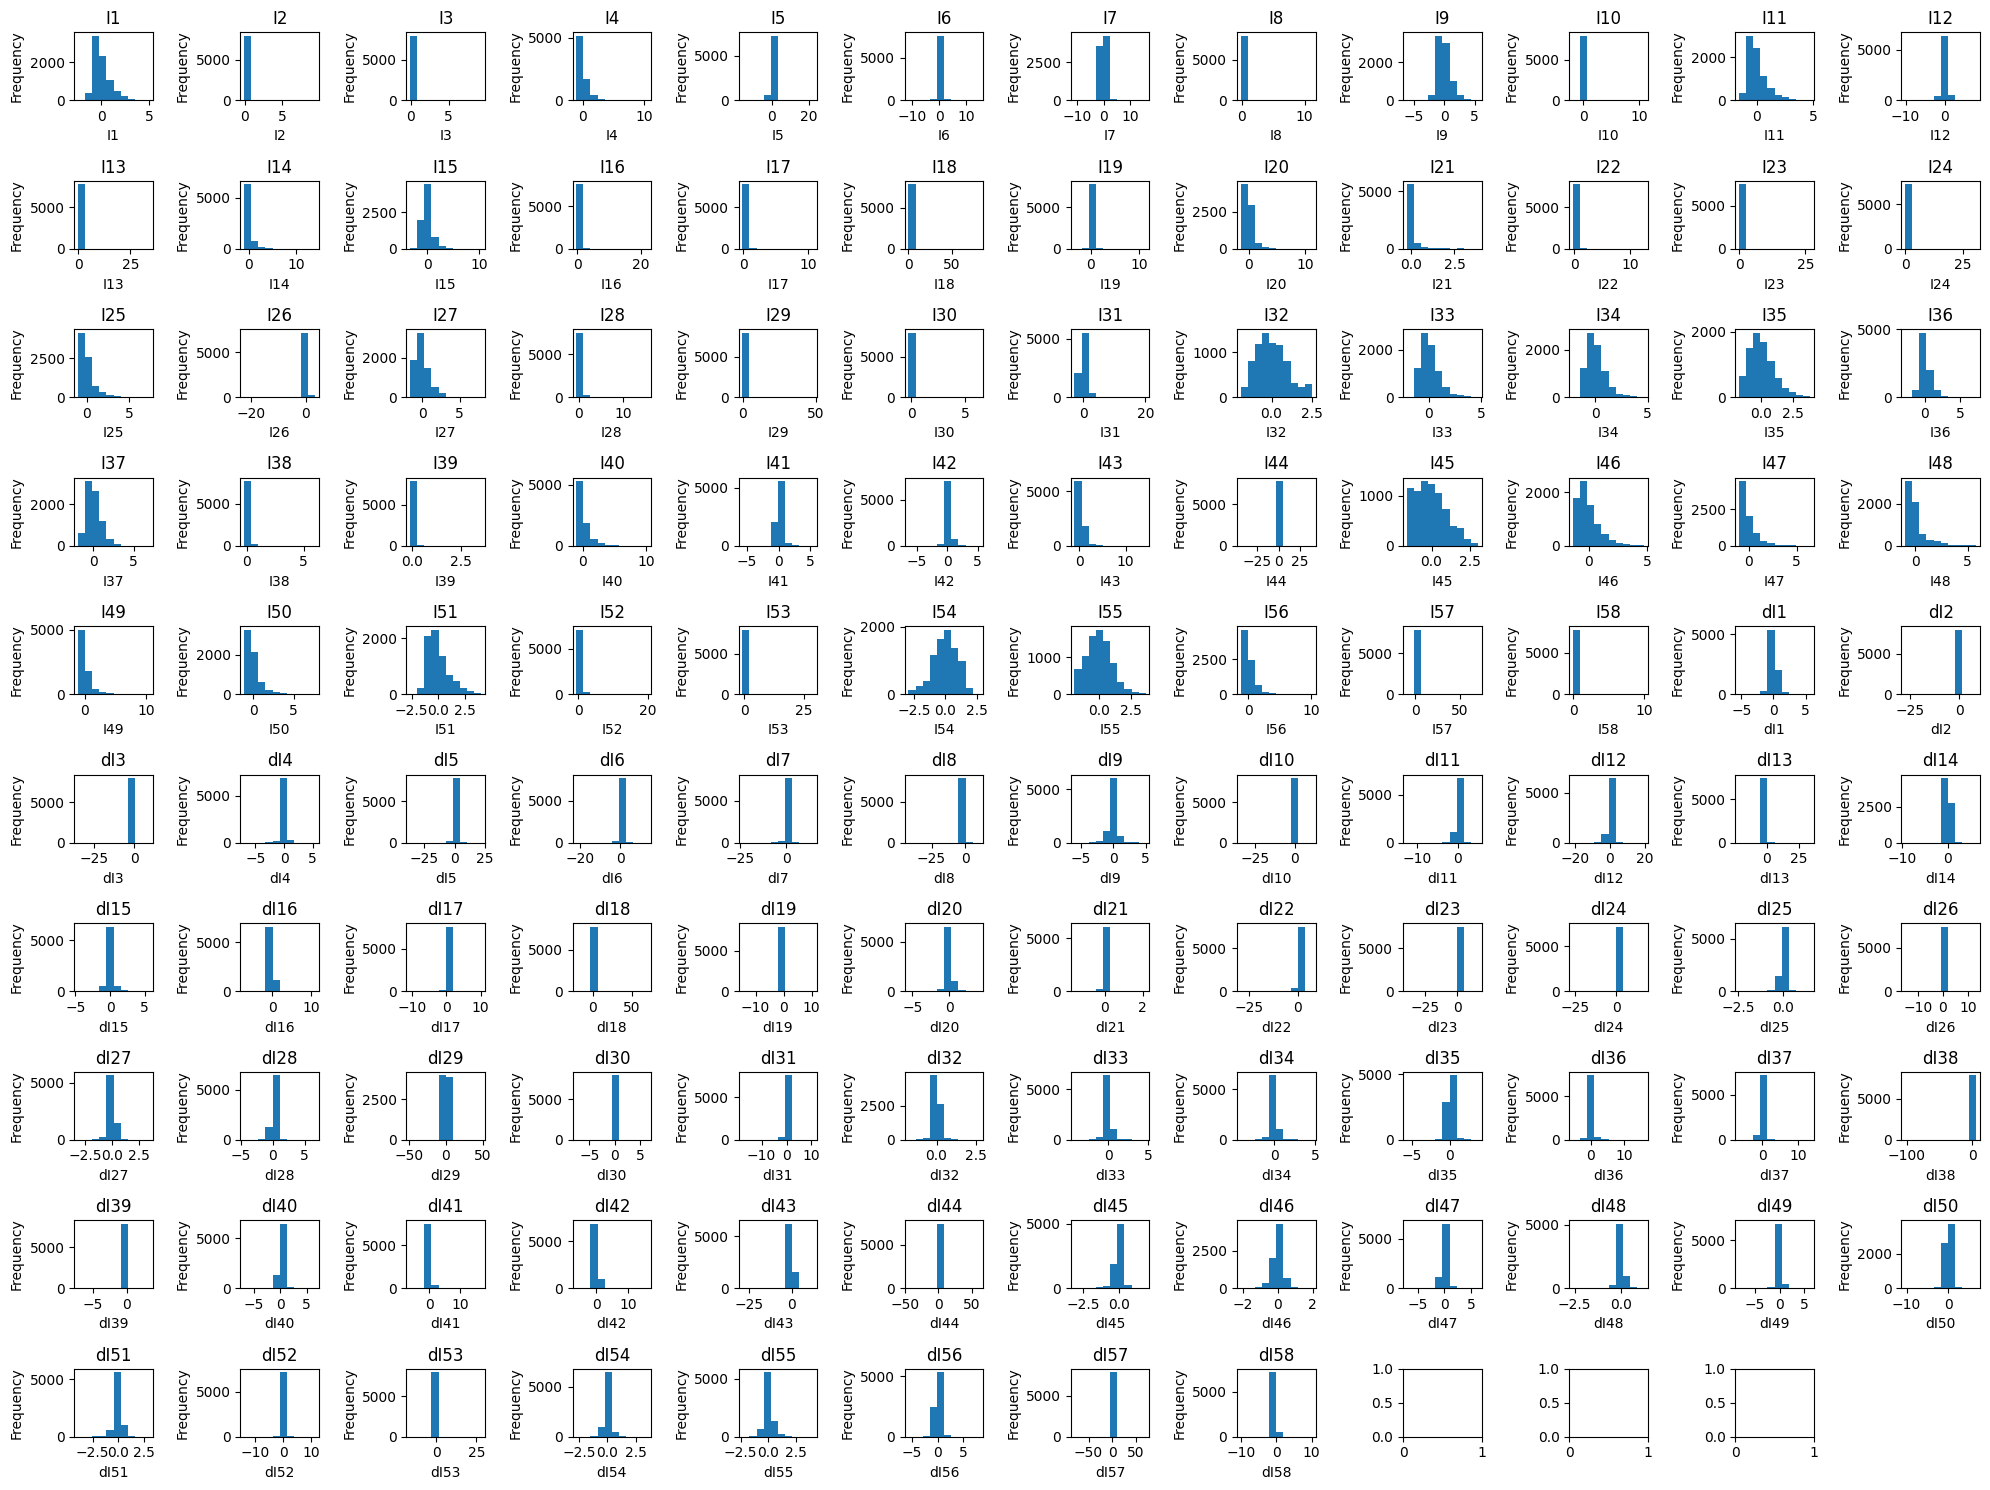

In [4]:
#Univariate analysis

import matplotlib.pyplot as plt

# Create subplots with 10 rows and 12 columns
fig, axes = plt.subplots(nrows=10, ncols=12, figsize=(20, 15))

# Flatten the axes array
axes = axes.flatten()

# Iterate over each column in the DataFrame and plot its distribution
for i, col in enumerate(data.columns[1:-2]):
    data[col].plot(kind='hist', ax=axes[i], title=col)
    axes[i].set_xlabel(col)

# Hide empty subplots
for i in range(len(data[1:-2].columns), len(axes)):
    axes[i].axis('off')

plt.tight_layout()
plt.show()

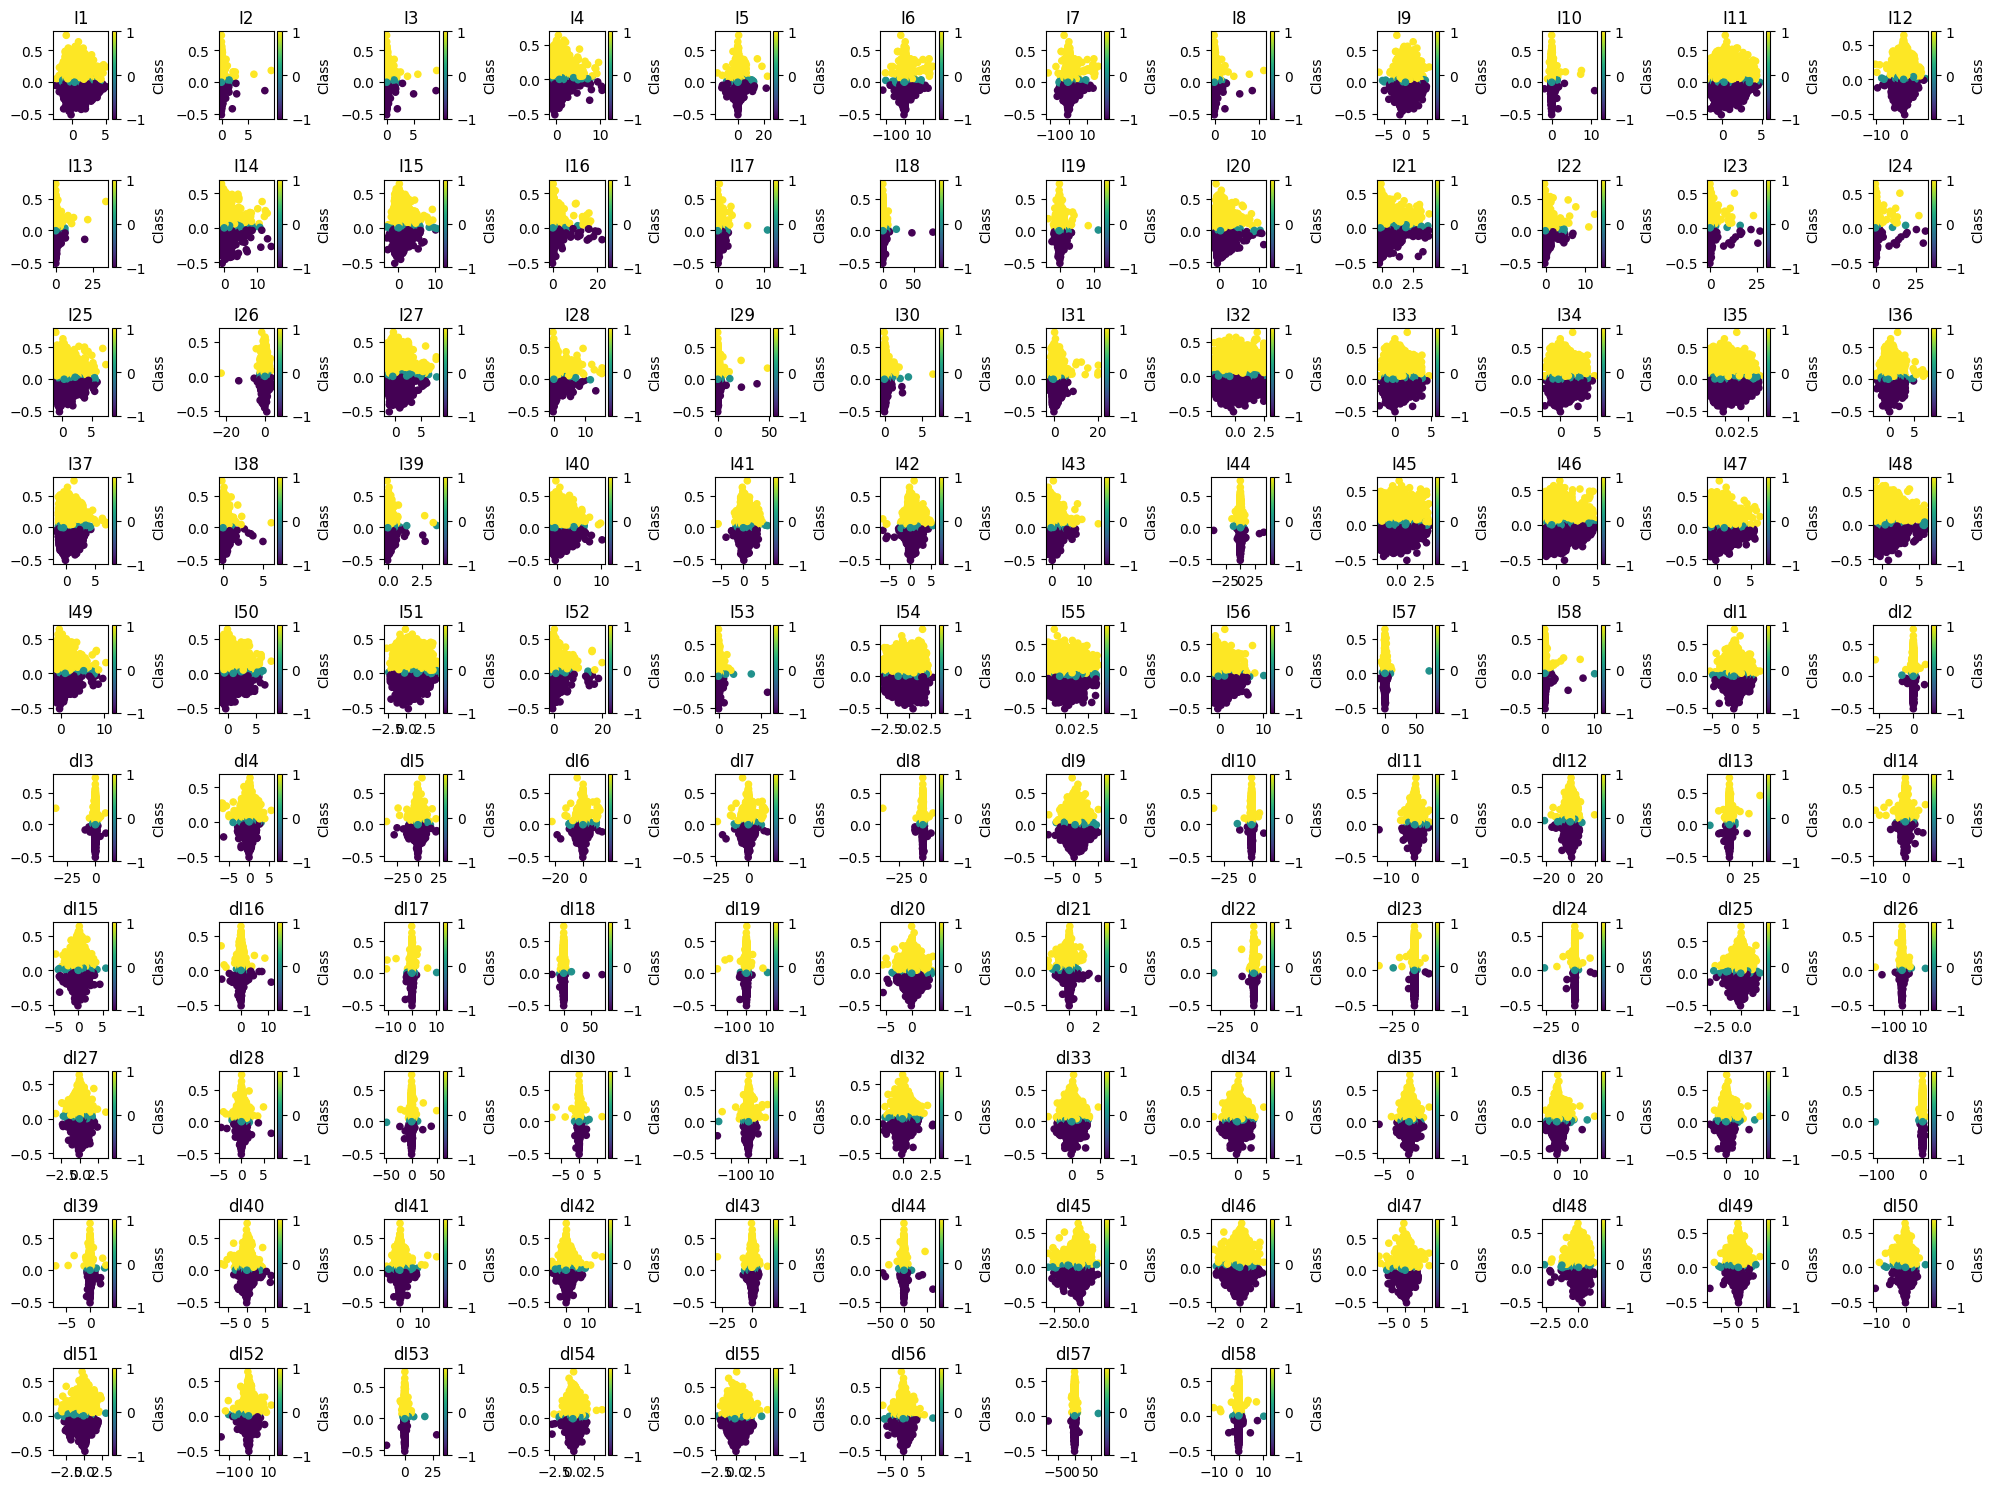

In [5]:
#bivariate analysis
fig, axes = plt.subplots(nrows=10, ncols=12, figsize=(20, 15))

# Flatten the axes array
axes = axes.flatten()

for i, col in enumerate(data.columns[1:-2]):
    # Plot scatter plot for each column against the 'perform' variable
    data.plot.scatter(x=col, y='Perform', ax=axes[i], title=col,
                                   c = 'Class', cmap = 'viridis')
    #axes[i].set_xticks([])
    #axes[i].set_yticks([])
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')

# Hide empty subplots
for i in range(len(data.columns[1:-2]), len(axes)):
    axes[i].axis('off')

plt.tight_layout()
plt.show()

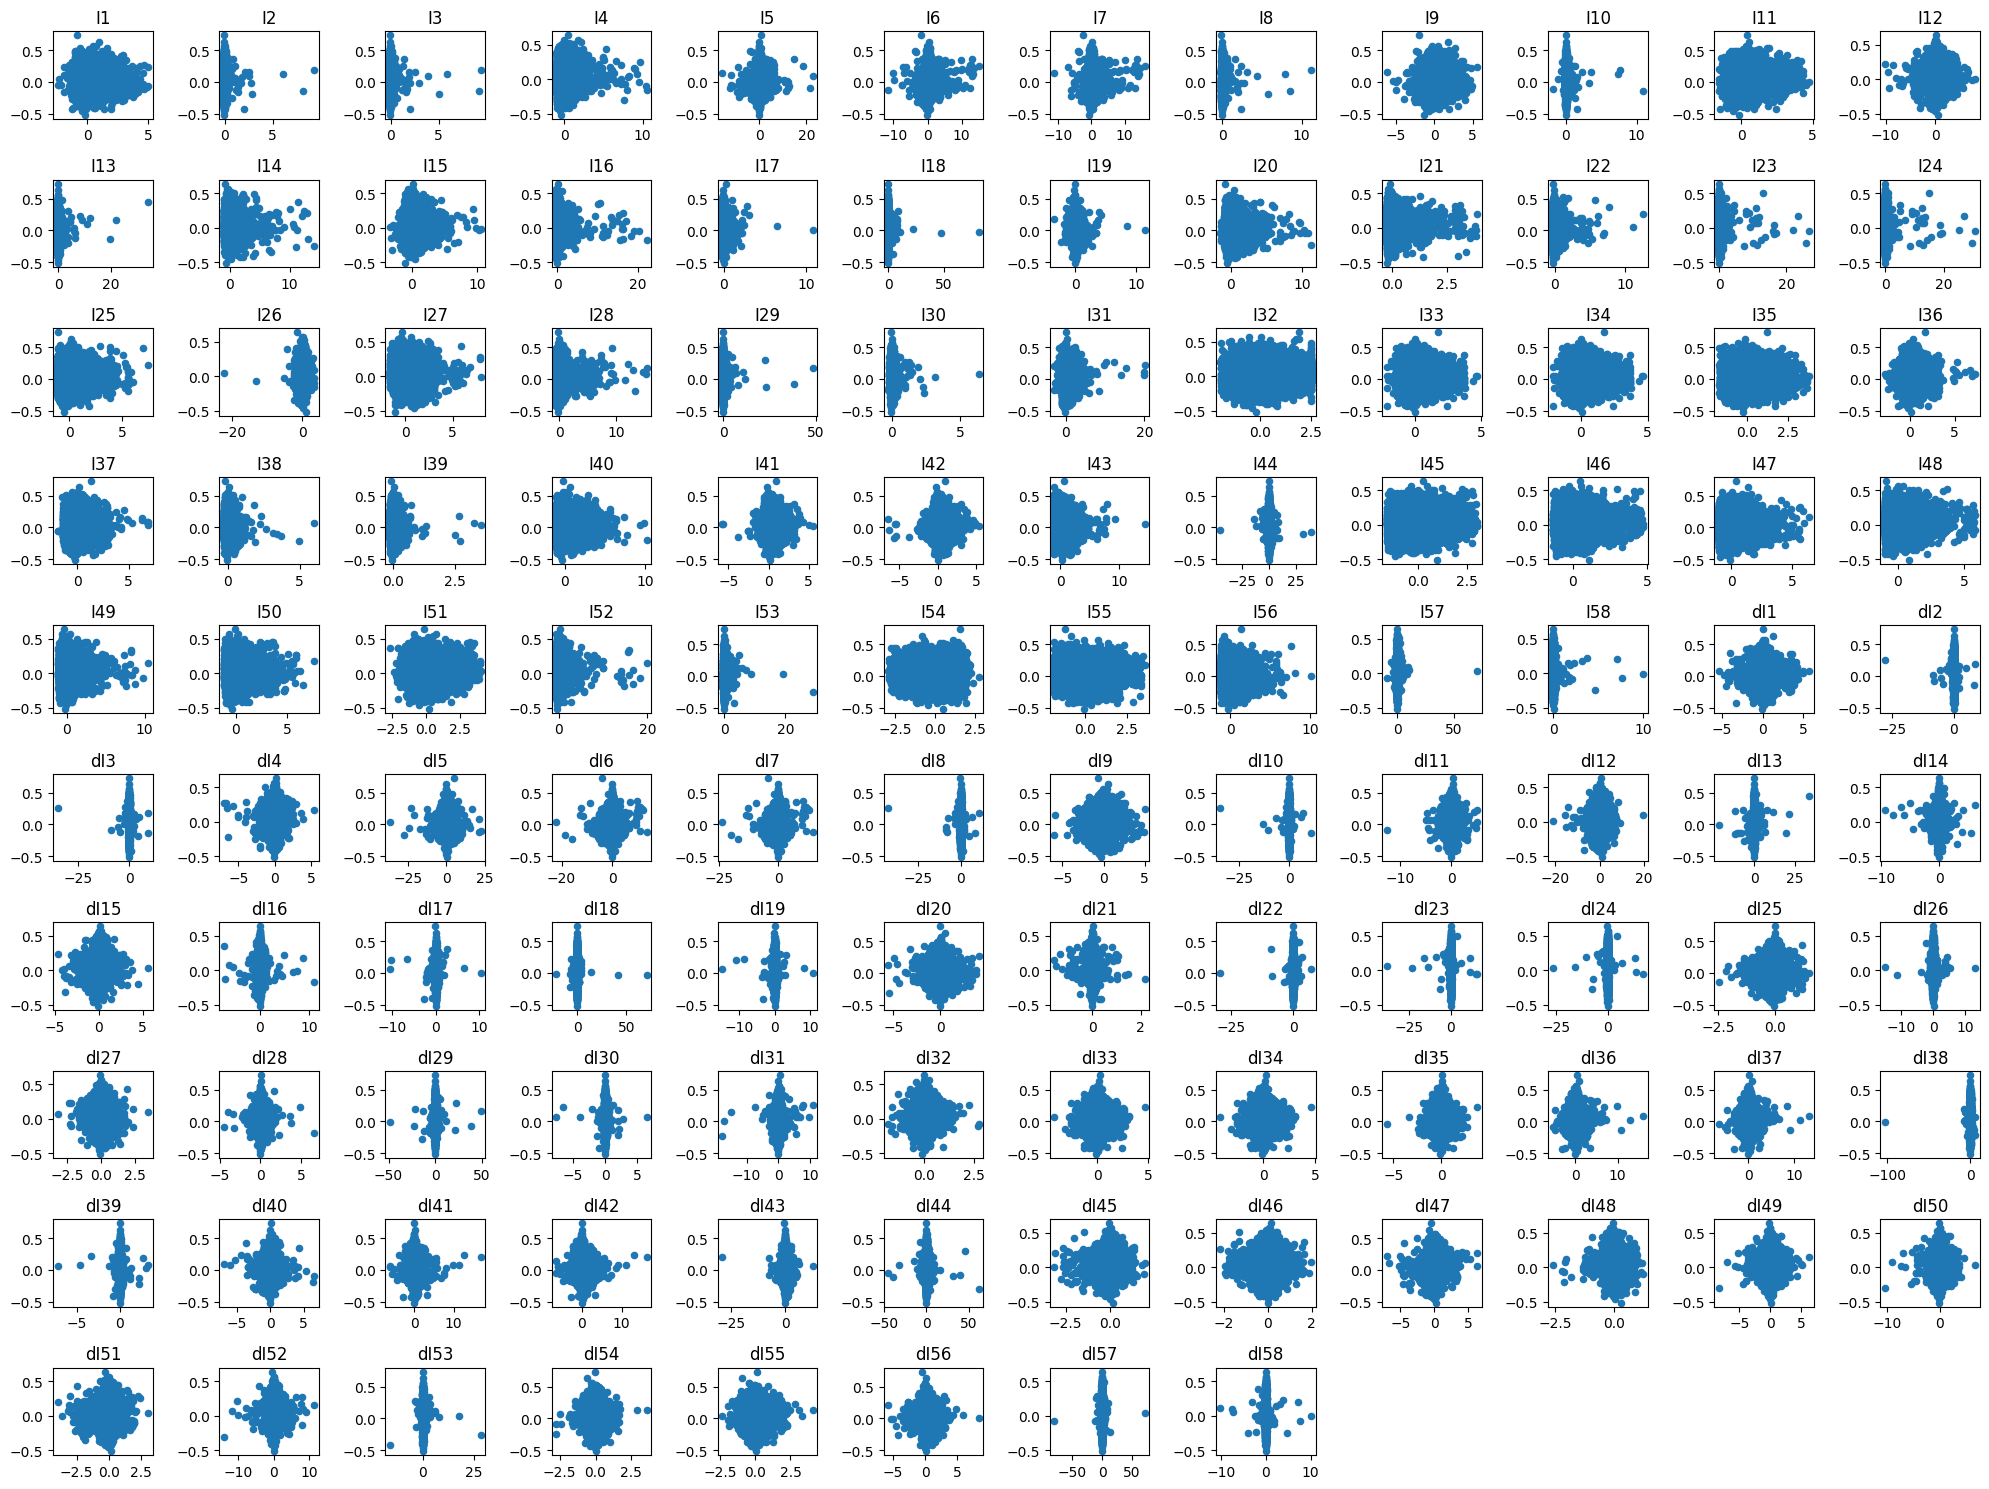

In [6]:
# Create subplots with 10 rows and 12 columns
fig, axes = plt.subplots(nrows=10, ncols=12, figsize=(20, 15))

# Flatten the axes array
axes = axes.flatten()

for i, col in enumerate(data.columns[1:-2]):
    # Plot scatter plot for each column against the 'perform' variable
    data.plot.scatter(x=col, y='Perform', ax=axes[i], title=col)
                                   
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')

# Hide empty subplots
for i in range(len(data.columns[1:-2]), len(axes)):
    axes[i].axis('off')

plt.tight_layout()
plt.show()

In [7]:
# Load the column dictionary from the CSV file into a DataFrame
column_dict_df = pd.read_csv('data\column_names_dictionary.csv', delimiter=';')

# Convert the column dictionary DataFrame to a dictionary
column_dict = dict(zip(column_dict_df['CODE'], column_dict_df['INDICATOR NAME']))
column_dict['Perform'] = 'Perform'  # Add mapping for 'perform' column
column_dict['Class'] = 'Class'      # Add mapping for 'class' column

#print(len(column_dict))
#119

# Map the encrypted column names to their original names using the column dictionary
data2 = data.rename(columns=column_dict)

# Now your DataFrame will have the original column names
# You can verify the changes by printing the columns of the DataFrame
data2.head()

,Industry sector,"Return on Average Total Assets - %, TTM","Return on Average Common Equity - %, TTM","EBITDA Percentage of Common Equity, TTM","EBITDA Percentage of Total Fixed Assets - Net, TTM",Excess Cash Margin - %,"Free Cash Flow Percentage of Total Revenue, TTM","Cash Flow from Operations Pct of Total Revenue, TTM","Cash Flow from Operations Pct of Common Equity, TTM","Cash Flow from Operations to Total Assets, TTM",...,1-year Absolute Change of Working Capital to Total Assets,1-year Absolute Change of Cash Ratio,1-year Absolute Change of Net Debt to Total Equity,1-year Absolute Change of Total Liabilities Percentage of Total Assets,1-year Absolute Change of Long Term Debt Percentage of Total Assets,1-year Absolute Change of Book Value Percentage of Market Capitalization,1-year Absolute Change of Cash Flow from Operations Pct of Capital Expenditures,"1-year Absolute Change of Price to Cash Flow from Operations per Share, TTM",Class,Perform
0,G9,0.136495,-0.028429,-0.037772,-0.232459,-0.016222,-0.187506,-0.322545,-0.043743,0.125389,...,0.102563,0.188481,-0.016027,-0.135451,-0.189667,0.250967,0.022171,-0.004265,-1.0,-0.033764
1,G5,-0.714522,-0.042137,-0.052968,-0.796862,-0.018394,0.070102,-0.076321,-0.063864,-1.045521,...,-0.016375,0.020727,-0.006525,-0.018790,-0.098543,0.317744,-0.180502,-0.009215,1.0,0.127771
2,G10,0.104791,-0.038188,-0.053191,0.620233,0.148587,0.489875,0.319274,-0.060246,0.053174,...,0.272937,0.774169,-0.007144,0.123954,0.000000,-0.110103,0.186669,-0.030720,1.0,0.183500
3,G2,-0.532847,-0.006582,-0.023377,1.306702,-0.068909,0.048024,-0.119481,-0.021057,-1.012916,...,0.004938,0.018494,-0.003350,-0.029214,0.045747,-0.076884,-0.037859,-0.012046,-1.0,-0.035668
4,G3,-0.200815,-0.016334,-0.036754,-0.886675,0.484495,-1.148744,0.152517,-0.043580,-0.935537,...,-0.014812,-0.324584,-0.019002,-0.379323,-0.046024,0.282145,0.011008,0.010496,1.0,0.235055


In [10]:
# Convert all columns except the first one to numeric
for col in data2.columns[1:-2]:  # Exclude the first column
    data2[col] = data2[col].replace(',', '.').astype(float)

data2["Perform"] = data2["Perform"].replace(',', '.').astype(float)

In [11]:
data2.head()

,Industry sector,"Return on Average Total Assets - %, TTM","Return on Average Common Equity - %, TTM","EBITDA Percentage of Common Equity, TTM","EBITDA Percentage of Total Fixed Assets - Net, TTM",Excess Cash Margin - %,"Free Cash Flow Percentage of Total Revenue, TTM","Cash Flow from Operations Pct of Total Revenue, TTM","Cash Flow from Operations Pct of Common Equity, TTM","Cash Flow from Operations to Total Assets, TTM",...,1-year Absolute Change of Working Capital to Total Assets,1-year Absolute Change of Cash Ratio,1-year Absolute Change of Net Debt to Total Equity,1-year Absolute Change of Total Liabilities Percentage of Total Assets,1-year Absolute Change of Long Term Debt Percentage of Total Assets,1-year Absolute Change of Book Value Percentage of Market Capitalization,1-year Absolute Change of Cash Flow from Operations Pct of Capital Expenditures,"1-year Absolute Change of Price to Cash Flow from Operations per Share, TTM",Class,Perform
0,G9,0.136495,-0.028429,-0.037772,-0.232459,-0.016222,-0.187506,-0.322545,-0.043743,0.125389,...,0.102563,0.188481,-0.016027,-0.135451,-0.189667,0.250967,0.022171,-0.004265,-1.0,-0.033764
1,G5,-0.714522,-0.042137,-0.052968,-0.796862,-0.018394,0.070102,-0.076321,-0.063864,-1.045521,...,-0.016375,0.020727,-0.006525,-0.018790,-0.098543,0.317744,-0.180502,-0.009215,1.0,0.127771
2,G10,0.104791,-0.038188,-0.053191,0.620233,0.148587,0.489875,0.319274,-0.060246,0.053174,...,0.272937,0.774169,-0.007144,0.123954,0.000000,-0.110103,0.186669,-0.030720,1.0,0.183500
3,G2,-0.532847,-0.006582,-0.023377,1.306702,-0.068909,0.048024,-0.119481,-0.021057,-1.012916,...,0.004938,0.018494,-0.003350,-0.029214,0.045747,-0.076884,-0.037859,-0.012046,-1.0,-0.035668
4,G3,-0.200815,-0.016334,-0.036754,-0.886675,0.484495,-1.148744,0.152517,-0.043580,-0.935537,...,-0.014812,-0.324584,-0.019002,-0.379323,-0.046024,0.282145,0.011008,0.010496,1.0,0.235055


In [12]:
# Check for missing values in each column
missing_values_per_column = data2.isna().sum()

# Check for missing values in the entire DataFrame
total_missing_values = data2.isna().sum().sum()

print("Missing values per column:")
print(missing_values_per_column)

print("\nTotal missing values in the DataFrame:", total_missing_values)

Missing values per column:
Industry sector                                                                      0
Return on Average Total Assets - %, TTM                                              0
Return on Average Common Equity - %, TTM                                             0
EBITDA Percentage of Common Equity, TTM                                              0
EBITDA Percentage of Total Fixed Assets - Net, TTM                                 525
                                                                                  ... 
1-year Absolute Change of Book Value Percentage of Market Capitalization            20
1-year Absolute Change of Cash Flow from Operations Pct of Capital Expenditures    135
1-year Absolute Change of Price to Cash Flow from Operations per Share, TTM        249
Class                                                                                0
Perform                                                                              0
Length: 119, dty

In [13]:
# Count the number of missing values in each row
missing_values_per_row = data2.isna().sum(axis=1)

# Count the total number of rows with missing values
total_rows_with_missing_values = (missing_values_per_row > 0).sum()
total_rows_with_missing_values

2806

In [126]:
data2.columns

Index(['Industry sector', 'Return on Average Total Assets - %, TTM',
       'Return on Average Common Equity - %, TTM',
       'EBITDA Percentage of Common Equity, TTM',
       'EBITDA Percentage of Total Fixed Assets - Net, TTM',
       'Excess Cash Margin - %',
       'Free Cash Flow Percentage of Total Revenue, TTM',
       'Cash Flow from Operations Pct of Total Revenue, TTM',
       'Cash Flow from Operations Pct of Common Equity, TTM',
       'Cash Flow from Operations to Total Assets, TTM',
       ...
       '1-year Absolute Change of Working Capital to Total Assets',
       '1-year Absolute Change of Cash Ratio',
       '1-year Absolute Change of Net Debt to Total Equity',
       '1-year Absolute Change of Total Liabilities Percentage of Total Assets',
       '1-year Absolute Change of Long Term Debt Percentage of Total Assets',
       '1-year Absolute Change of Book Value Percentage of Market Capitalization',
       '1-year Absolute Change of Cash Flow from Operations Pct of C

In [78]:
# Data Preprocessing

# Assuming 'group_column' is the column used for grouping
group_column = 'group_column'

# Separate features and target variable
X = data2.drop(columns=["Class","Perform"])  # Features
y = data2["Class"]  # Target variable

# Define numerical and categorical columns
numeric_features = X.select_dtypes(include=['float64', 'int64']).columns.tolist()
categorical_features = X.select_dtypes(include=['object']).columns.tolist()

# Define preprocessing steps for numerical and categorical features
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),  # Impute missing values with median
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Impute missing values with most frequent value
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine preprocessing steps using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Define the model
model = RandomForestClassifier()  # Example model, replace with your chosen model

# Create the pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', model)
])

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the pipeline (including imputation) to the training data
pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_test)

# Evaluate the model on the test data
accuracy = pipeline.score(X_test, y_test)
print("Accuracy:", accuracy)


Accuracy: 0.46625


In [80]:
from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(y_test, y_pred)
print(conf_mat)

[[245   6 371]
 [ 75   3 138]
 [258   6 498]]


In [15]:
# Get the names of the one-hot encoded columns
one_hot_columns = pipeline.named_steps['preprocessor'].named_transformers_['cat'].get_feature_names_out().tolist()
features_list = X_train.columns[1:].tolist()

one_hot_columns.extend(features_list)
print(one_hot_columns)

['Industry sector_G1', 'Industry sector_G10', 'Industry sector_G11', 'Industry sector_G2', 'Industry sector_G3', 'Industry sector_G4', 'Industry sector_G5', 'Industry sector_G6', 'Industry sector_G7', 'Industry sector_G8', 'Industry sector_G9', 'Return on Average Total Assets - %, TTM', 'Return on Average Common Equity - %, TTM', 'EBITDA Percentage of Common Equity, TTM', 'EBITDA Percentage of Total Fixed Assets - Net, TTM', 'Excess Cash Margin - %', 'Free Cash Flow Percentage of Total Revenue, TTM', 'Cash Flow from Operations Pct of Total Revenue, TTM', 'Cash Flow from Operations Pct of Common Equity, TTM', 'Cash Flow from Operations to Total Assets, TTM', 'Reinvestment Rate - %, TTM', 'Return on Capital Employed - %, TTM', 'Working Capital Percentage of Total Revenue, YoY Diff, TTM', 'Dividend Payout Ratio - %, TTM', 'Payables Turnover, TTM', 'Cash Flow from Operations Ratio, TTM', 'Cash Percentage of Total Revenue, TTM', 'Debt - Total to EBITDA, TTM', 'FCF Net of Dividends Pct of De

In [16]:
# Get feature importances
feature_importances = pipeline.named_steps['model'].feature_importances_

# Create a DataFrame to store feature names and their importances
importance_df = pd.DataFrame({'Feature': one_hot_columns, 'Importance': feature_importances})

# Sort the DataFrame by importance scores (descending order)
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Print or visualize the DataFrame to see feature importances
print(importance_df)


                                               Feature  Importance
56   Total Current Liabilities Percentage of Total ...    0.011925
115  1-year Absolute Change of Cash & Cash Equivale...    0.011462
4                                   Industry sector_G3    0.011286
101  1-year Absolute Change of Operating Margin - %...    0.011008
114  1-year Absolute Change of Total Current Liabil...    0.010554
..                                                 ...         ...
120               1-year Absolute Change of Cash Ratio    0.000396
116  1-year Absolute Change of Inventories Percenta...    0.000370
118              1-year Absolute Change of Quick Ratio    0.000361
117            1-year Absolute Change of Current Ratio    0.000219
124  1-year Absolute Change of Book Value Percentag...    0.000111

[127 rows x 2 columns]


In [22]:
# Define the model
model_reg = RandomForestRegressor()  # Example model, replace with your chosen model

# Create the pipeline
pipeline_reg = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model_reg', model_reg)
])

# y
yPerform = data2['Perform']
# Split the data into training and test sets
X_train, X_test, yPerform_train, yPerform_test = train_test_split(X, yPerform, test_size=0.2, random_state=42)

# Fit the pipeline (including imputation) to the training data
pipeline_reg.fit(X_train, yPerform_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Return on Average Total '
                                                   'Assets - %, TTM',
                                                   'Return on Average Common '
                                                   'Equity - %, TTM',
                                                   'EBITDA Percentage of '
                                                   'Common Equity, TTM',
                                                   'EBITDA Percentage of Total '
                                                   'Fixed Assets - Net, TTM',
                                                   'Excess Cash Margin - %',
                                                   'Free...
                                                   'Asset Turnover, TTM',
                                                   'Average Net Trade Cycle '
                                                   'Days, TTM',
                                                   'Current Asset Turnover, '
                                                   'TTM',
                                                   'Fixed Asset Turnover, TTM',
                                                   'Enterprise Value to EBIT, '
                                                   'TTM',
                                                   'Enterprise Value to '
                                                   'EBITDA, TTM', ...]),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Industry sector'])])),
                ('model_reg', RandomForestRegressor())])

In [23]:
yPerform_pred = pipeline_reg.predict(X_test)

In [24]:
mse = np.mean((yPerform_test - yPerform_pred)**2)
mse

0.02142778467179505

In [26]:
# Get class prediction from Perform prediction
yPerform_pred = np.round(yPerform_pred, 3)
class_pred = []
for i in range(len(yPerform_pred)):
    val = yPerform_pred[i]
    if val>0:
        class_pred.append(1)
    elif val<0:
        class_pred.append(-1)
    else:
        class_pred.append(0)

class_test = data2.loc[yPerform_test.index,'Class']
accuracy = accuracy_score(class_test, class_pred)
print("Accuracy:", accuracy)
conf_mat = confusion_matrix(y_test, class_pred)
print(conf_mat)

Accuracy: 0.485625


In [111]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report
#X = data.drop(columns = ['Class', 'Perform'])
#y = data['Class']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Map labels to integers (0, 1, 2)
y_train_mapped = y_train + 1
y_test_mapped = y_test + 1

# Initialize the XGBoost classifier
model_xg = xgb.XGBClassifier()

pipeline_xg = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model_xg', model_xg)
])

# Train the classifier
pipeline_xg.fit(X_train, y_train_mapped)

# Predict on the test set
y_pred_xg = pipeline_xg.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test_mapped, y_pred_xg)
print("Accuracy:", accuracy)

# Classification report
print("Classification Report:")
print(classification_report(y_test_mapped, y_pred_xg))


Accuracy: 0.481875
Classification Report:
              precision    recall  f1-score   support

         0.0       0.45      0.43      0.44       622
         1.0       0.22      0.03      0.05       216
         2.0       0.51      0.65      0.57       762

    accuracy                           0.48      1600
   macro avg       0.39      0.37      0.35      1600
weighted avg       0.45      0.48      0.45      1600



In [86]:
conf_mat = confusion_matrix(y_test, y_pred_xg)
print(conf_mat)

[[  0 269   7 346]
 [  0  78   6 132]
 [  0 252  14 496]
 [  0   0   0   0]]


In [ ]:
# Feature importance
importances = model_xg.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': one_hot_columns, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

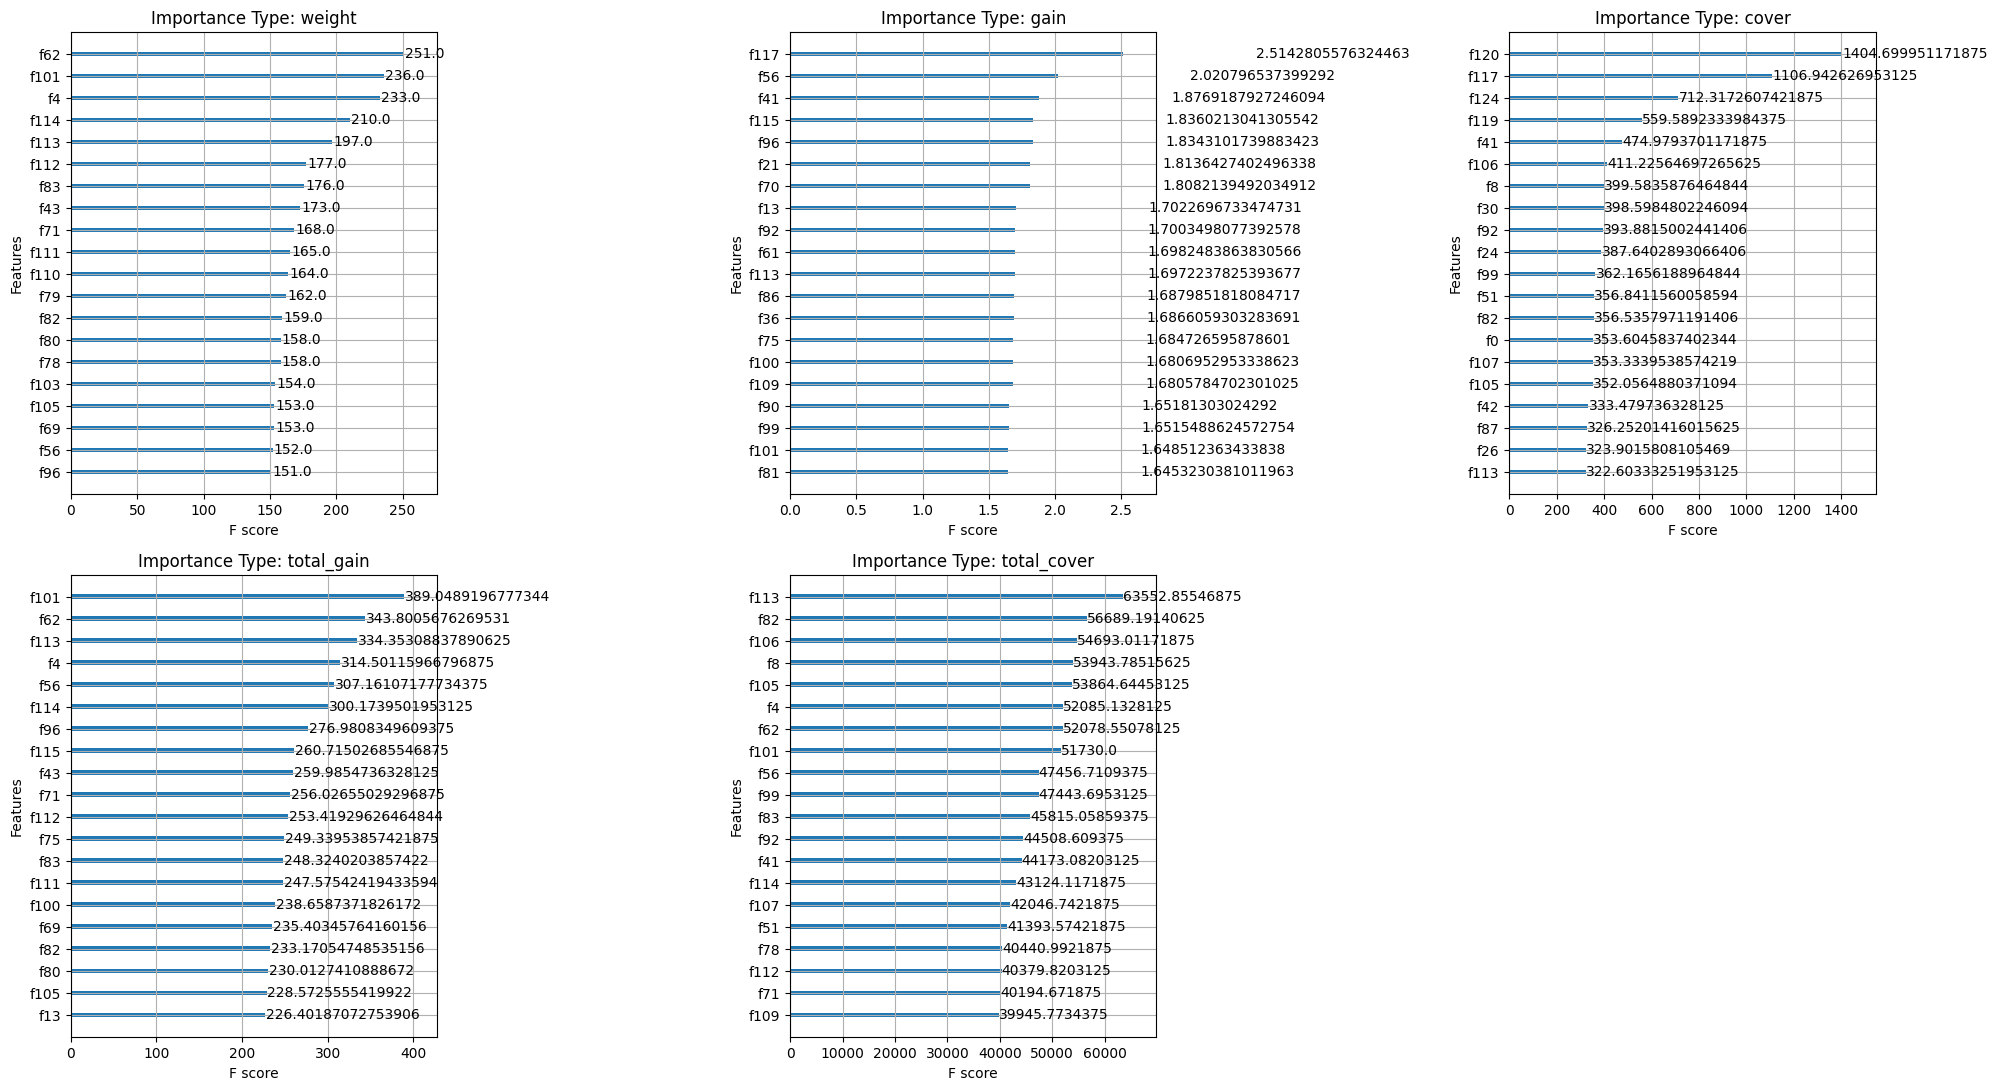

In [123]:
#best

# Define the types of importance
importance_types = ['weight', 'gain', 'cover', 'total_gain', 'total_cover']

# Plot feature importance for each type
plt.figure(figsize=(20, 16))
for i, importance_type in enumerate(importance_types, start=1):
    plt.subplot(3, 3, i)
    xgb.plot_importance(model_xg, importance_type=importance_type, max_num_features=20, ax=plt.gca())
    plt.title(f'Importance Type: {importance_type}')

plt.tight_layout()
plt.show()

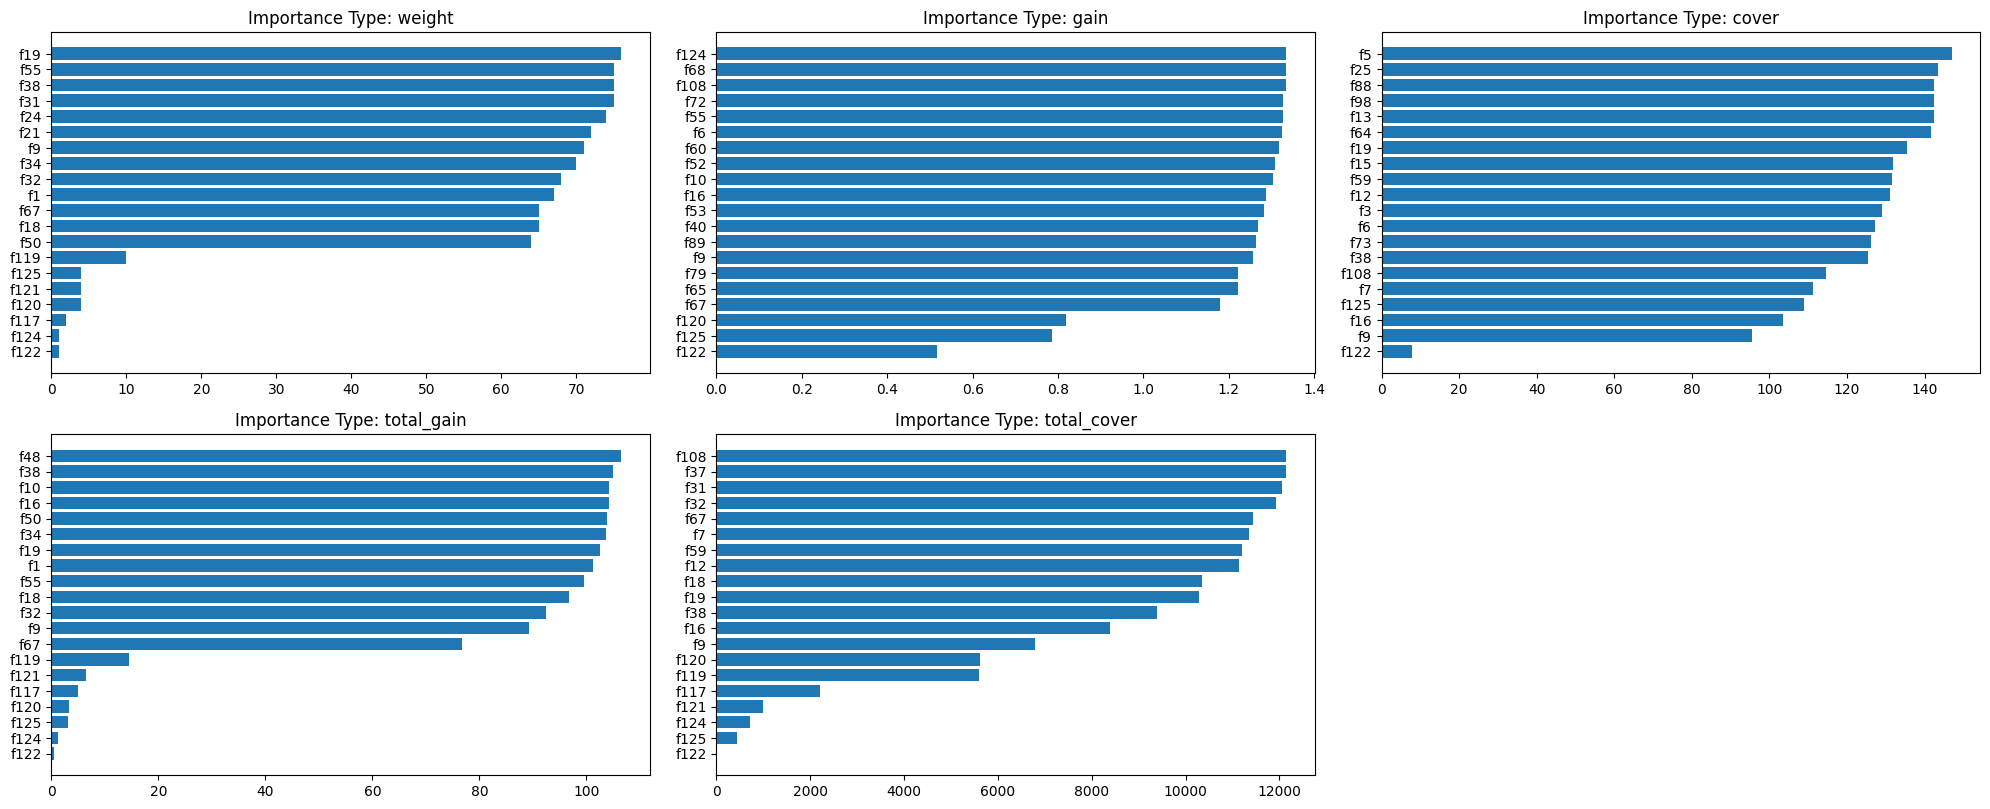

In [65]:
#worst
# Plot feature importance for each type
plt.figure(figsize=(20, 16))
for i, importance_type in enumerate(importance_types, start=1):
    plt.subplot(4, 3, i)
    importance = model_xg.get_booster().get_score(importance_type=importance_type)
    sorted_importance = sorted(importance.items(), key=lambda x: x[1], reverse=False)[:20]  
    features, scores = zip(*sorted_importance)
    plt.barh(features, scores)
    plt.title(f'Importance Type: {importance_type}')

plt.tight_layout()
plt.show()

In [87]:
data.columns

Index(['Group', 'I1', 'I2', 'I3', 'I4', 'I5', 'I6', 'I7', 'I8', 'I9',
       ...
       'dI51', 'dI52', 'dI53', 'dI54', 'dI55', 'dI56', 'dI57', 'dI58', 'Class',
       'Perform'],
      dtype='object', length=119)

In [90]:
importances = []
for i in importance_types:
    importance = model_xg.get_booster().get_score(importance_type = importance_type)
    importances.append(dict(zip(one_hot_columns2, importance.values())))

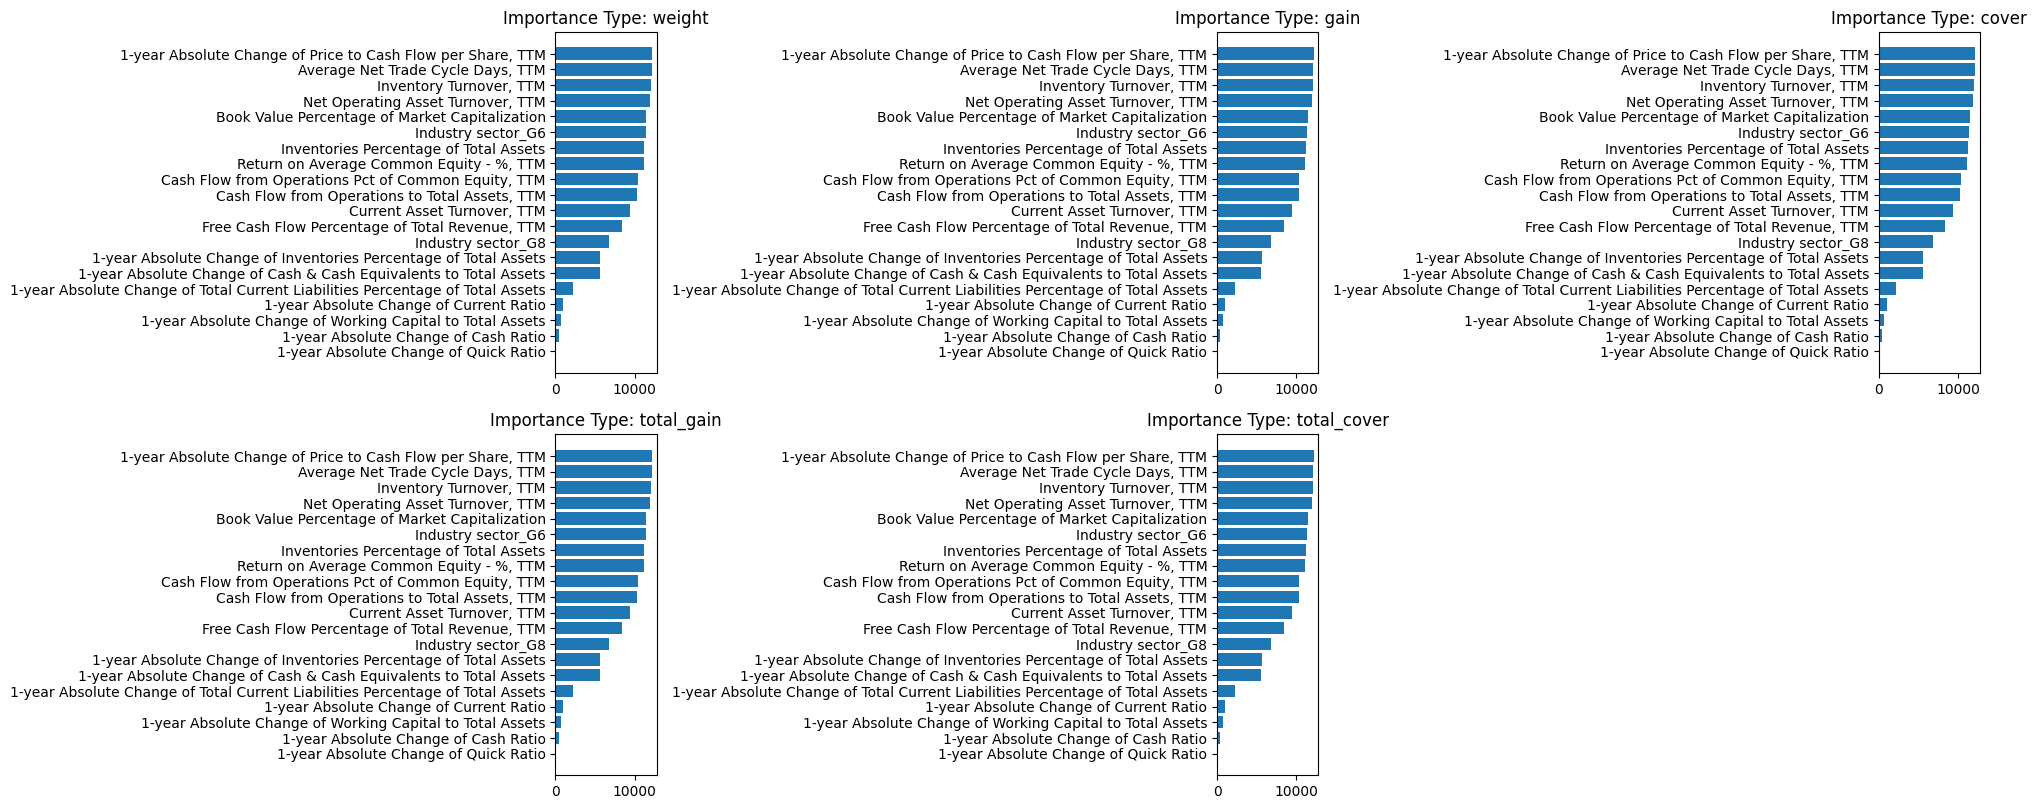

In [122]:
plt.figure(figsize=(20, 16))
for i, importance_type in enumerate(importance_types, start=0):
    plt.subplot(4, 3, i+1)
    sorted_importance = sorted(importances[i].items(), key=lambda x: x[1], reverse=False)[:20]  
    features, scores = zip(*sorted_importance)
    plt.barh(features, scores)
    plt.title(f'Importance Type: {importance_type}')

plt.tight_layout()
plt.show()

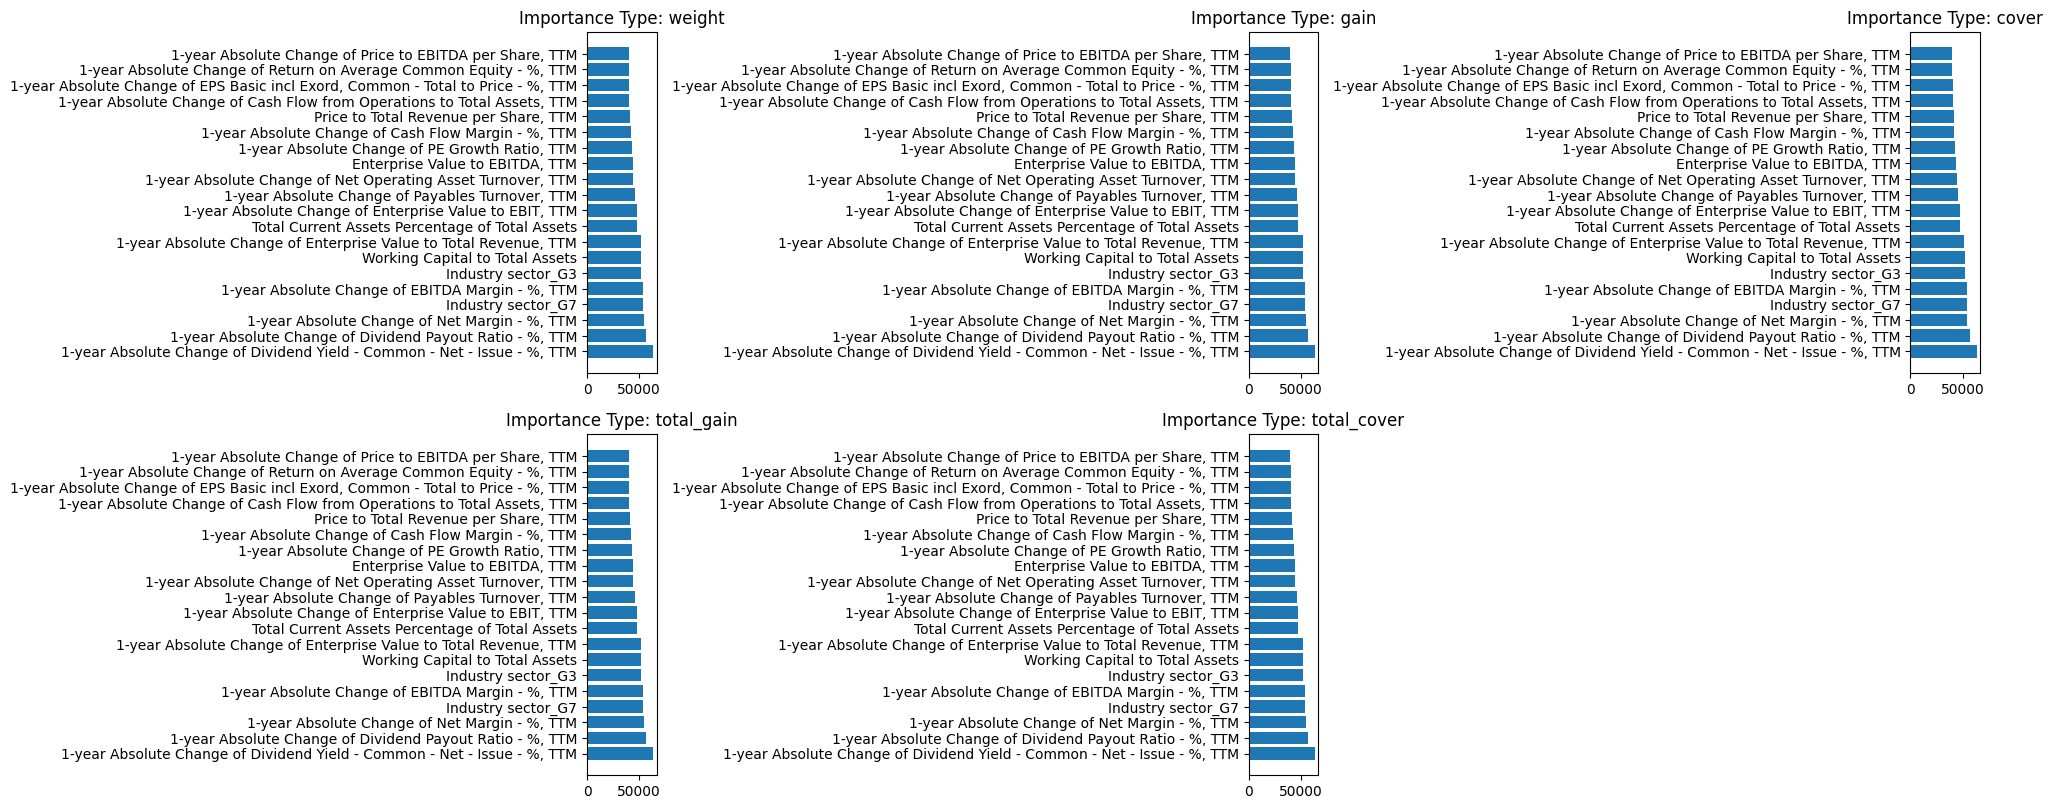

In [77]:
plt.figure(figsize=(20, 16))
for i, importance_type in enumerate(importance_types, start=0):
    plt.subplot(4, 3, i+1)
    sorted_importance = sorted(importances[i].items(), key=lambda x: x[1], reverse=True)[:20]  
    features, scores = zip(*sorted_importance)
    plt.barh(features, scores)
    plt.title(f'Importance Type: {importance_type}')

plt.tight_layout()
plt.show()

# Lasso, Ridge

In [177]:
from sklearn.linear_model import Lasso, Ridge
from sklearn.metrics import mean_squared_error

lasso_model = Pipeline(steps=[('preprocessor', preprocessor),
                              ('lasso', Lasso(alpha = 1.0))])
lasso_model.fit(X_train, yPerform_train)

lasso_pred = lasso_model.predict(X_test)

lasso_rmse = mean_squared_error(yPerform_test, lasso_pred, squared=False)

print("Lasso Regression RMSE:", lasso_rmse)

lasso_coef_df = pd.DataFrame({'features' : one_hot_columns, 'Lasso Coefficient' : lasso_model.named_steps['lasso'].coef_})

print(lasso_coef_df.loc[lasso_coef_df.loc[:,'Lasso Coefficient']>0,'features'])

Lasso Regression RMSE: 0.14638087816141337
Series([], Name: features, dtype: object)


C:\Users\Dell\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [213]:
ridge_model = Pipeline(steps=[('preprocessor', preprocessor),
                              ('ridge', Ridge())])

ridge_model.fit(X_train, yPerform_train)

ridge_pred = ridge_model.predict(X_test)

ridge_rmse = mean_squared_error(yPerform_test, ridge_pred, squared=False)

print("Ridge Regression RMSE:", ridge_rmse)

# Creating a DataFrame to display coefficients
ridge_coef_df = pd.DataFrame({'features': one_hot_columns, 'Ridge Coefficient': ridge_model.named_steps['ridge'].coef_})


Ridge Regression RMSE: 0.14594709740007847
Ridge Regression Coefficients:
                                              features  Ridge Coefficient
1                                  Industry sector_G10           0.031003
3                                   Industry sector_G2           0.000946
4                                   Industry sector_G3           0.003935
5                                   Industry sector_G4           0.002767
8                                   Industry sector_G7           0.018073
..                                                 ...                ...
116  1-year Absolute Change of Inventories Percenta...           0.029884
117            1-year Absolute Change of Current Ratio           0.025928
119  1-year Absolute Change of Working Capital to T...           0.008791
121  1-year Absolute Change of Net Debt to Total Eq...           0.006735
123  1-year Absolute Change of Long Term Debt Perce...           0.006512

[67 rows x 2 columns]


C:\Users\Dell\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [220]:
pd.set_option('display.max_rows', 100) 
ridge_coef_nonzero = ridge_coef_df.loc[ ridge_coef_df.loc[:,'Ridge Coefficient']>0, ['features','Ridge Coefficient']]

In [221]:
ridge_coef_nonzero

,features,Ridge Coefficient
1,Industry sector_G10,0.031003
3,Industry sector_G2,0.000946
4,Industry sector_G3,0.003935
5,Industry sector_G4,0.002767
8,Industry sector_G7,0.018073
10,Industry sector_G9,0.000403
12,"Return on Average Common Equity - %, TTM",0.003110
13,"EBITDA Percentage of Common Equity, TTM",0.000075
14,"EBITDA Percentage of Total Fixed Assets - Net,...",0.000679
16,"Free Cash Flow Percentage of Total Revenue, TTM",0.002954


In [228]:
# Get class prediction from Perform prediction
yPerform_pred = np.round(ridge_pred, 3)
class_pred = []
for i in range(len(yPerform_pred)):
    val = yPerform_pred[i]
    if val>0:
        class_pred.append(1)
    elif val<0:
        class_pred.append(-1)
    else:
        class_pred.append(0)

class_test = data2.loc[yPerform_test.index,'Class']
accuracy = accuracy_score(y_test, class_pred)
print("Accuracy:", accuracy)
conf_mat = confusion_matrix(y_test, class_pred)
print(conf_mat)

Accuracy: 0.48625
[[ 73   4 545]
 [ 28   1 187]
 [ 56   2 704]]


In [194]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Assuming you have your data stored in X

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_preprocessed)

# Initialize PCA
pca = PCA(n_components=10)  # You can adjust the number of components as needed

# Fit PCA to the scaled data
pca.fit(X_scaled)

# Transform the data to the new feature space
X_pca = pca.transform(X_scaled)

# X_pca now contains the principal components


In [195]:
X_pca = pd.DataFrame(X_pca)
rf_classifier = RandomForestClassifier()
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# Fit the pipeline (including imputation) to the training data
rf_classifier.fit(X_train, y_train)

y_pred = rf_classifier.predict(X_test)

# Evaluate the model on the test data
accuracy = rf_classifier.score(X_test, y_test)
print("Accuracy:", accuracy)

Accuracy: 0.47375


In [ ]:
accuracies = []
for n_components in range(30, 70):
    # Standardize the features
    
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X_preprocessed)

    # Initialize PCA
    pca = PCA(n_components=n_components)  # You can adjust the number of components as needed

    # Fit PCA to the scaled data
    pca.fit(X_scaled)

    # Transform the data to the new feature space
    X_pca = pca.transform(X_scaled)

    # X_pca now contains the principal components
    X_pca = pd.DataFrame(X_pca)

    rf_classifier = RandomForestClassifier()
    # Split the data into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

    # Fit the pipeline (including imputation) to the training data
    rf_classifier.fit(X_train, y_train)

    y_pred = rf_classifier.predict(X_test)

    # Evaluate the model on the test data
    accuracies.append(rf_classifier.score(X_test, y_test))


In [ ]:

# Assuming you have a list of accuracies named 'accuracies'
# Generate index values
indices = range(30, 60)

# Plot index against accuracy
plt.plot(indices, accuracies, marker='o', linestyle='-')
plt.xlabel('n')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. n_components')
plt.grid(True)
plt.show()

In [204]:
accuracies[14]

0.493125